In [1]:
import random
import string
import abc
import sys
from datetime import datetime
from models import *
from functions import *


d:\AQUI\banking-system-emulator\flask-app\app


In [2]:
rand_str = lambda l : rand_str(l-1)+random.choice(string.ascii_lowercase) if l > 1 else random.choice(string.ascii_lowercase)
rand_str(10)

&#39;rcbdtjqune&#39;

In [3]:
import pandas as pd

In [4]:
Client.change_client(id = '7-589-631', client_name= 'Susana Castillo')

ERROR


In [5]:
PRODUCTS = (SavingAccount,FixedTermDeposit,Loan,CreditCard)

### FUNCIONES

In [6]:
prueba = lambda s: s if (len(df_transactions[df_transactions['id']==s])) == 0 else prueba(random.choice(range(100000,999999)))

In [7]:

def generate_product_ids():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1000000,9999999)))
  product_ids.append(id)
  return id   


In [8]:

def generate_credit_card_number():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1000,9999)))+ str(random.choice(range(1000,9999)))+ str(random.choice(range(1000,9999)))+ str(random.choice(range(1000,9999)))
  product_ids.append(id)
  return id   


In [9]:

def generate_transaction_id():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(100000,9999999)))
  transaction_ids.append(id)
  return id   


In [10]:

def generate_client_id():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1,11)))+"-"+ str(random.choice(range(100,999)))+"-"+ str(random.choice(range(1,999)))
  ids.append(id)
  return id   


In [11]:
def generate_saving_accounts(n):
  accs = []
  for i in range(n):
    accs.append(SavingAccount(
        id = generate_product_ids()
    ))
  return accs

In [12]:
def generate_clients(n):
  clients = []
  for i in range(n):
    clients.append(Client(
        id = generate_client_id(),
        name = rand_str(10) +" "+rand_str(15),
        products = []
    ))
  return clients


In [13]:
def generate_balance():
  n = random.choice(range(0,500000))
  cash= ("${:5.2f}".format(n))
  return cash

## Generar Entidades

In [14]:
%%time
ids = []
product_ids = []
clientes = generate_clients(1000)
products = []

# POR CADA PRODUCTO GENERADO...
for cliente in clientes:
  # SELECCIONO UNA CANTIDAD DE PRODUCTOS ALEATORIAMENTE
  cantidad_productos = random.choice(range(1,5))
  
  # POR LA CANTIDAD DE PRODUCTOS SELECCIONADOS...
  for p in range(0,cantidad_productos):    

    # SELECCIONO ALEATORIAMENTE UN TIPO DE PRODUCTO
    tipo_producto = PRODUCTS[random.choice(range(0,len(PRODUCTS)))]

    month = random.choice(range(1,13))
    # SI EL MES ES FEBRERO... ENTRE 1 Y 28
    if month == 2: day = random.choice(range(1,29))
    # SI EL MES ES PAR EN EL SEGUNDO SEMESTRE O ES IMPAR EN EL PRIMER SEMESTRE... ENTRE 1 Y 31
    elif (month % 2 == 0 and month >= 8) or (month % 2 != 0 and month < 8): day = random.choice(range(1,32))
    # DE CUALQUIER OTRA FORMA... ENTRE 1 Y 30
    else: day = random.choice(range(1,30))

    # INSTANCIO EL PRODUCTO
    if tipo_producto is Loan:
      producto = tipo_producto(
          id=generate_product_ids(),
          interest_rate=random.choice(range(3,17)),
          owner = cliente.id,
          base= random.choice([365,360]),
          length = random.choice(range(1,120)),
          From = datetime(random.choice(range(2018,2020+1)),month ,day))
    elif tipo_producto is CreditCard:
      producto = tipo_producto(
          id=generate_credit_card_number(),
          interest_rate=random.choice(range(1,3)),
          owner = cliente.id
          )
    else:
      producto = tipo_producto(
          id=generate_product_ids(),
          interest_rate=random.choice(range(1,3)),
          balance = random.choice(range(1,500000)),
          owner = cliente.id
          )
 
    # RELACIONO EL PRODUCTO CON EL CLIENTE ACTUAL
    cliente.products.append(producto)
    products.append(producto)
print(type (tipo_producto.balance))

print("Productos generados:",len(products))
print("Clientes generados:",len(clientes))

&lt;class &#39;property&#39;&gt;
Productos generados: 2506
Clientes generados: 1000
Wall time: 530 ms


In [15]:
products[0].owner

&#39;10-698-225&#39;

## Generar transacciones

In [16]:
%%time
MIN_TRX = 10
MAX_TRX = 100
transactions = []
transaction_ids = []



for cliente in clientes:
  for producto in cliente.products:
    
    if type(producto) is SavingAccount or type(producto) is FixedTermDeposit :
      # SELECCIONAR UN NUMERO ALEATORIO DE TRANSACCIONES PARA CADA PRODUCTO
      n_Trx = random.choice(range(MIN_TRX,MAX_TRX))

      for trx in range(n_Trx):
        month = random.choice(range(1,13))
        # SI EL MES ES FEBRERO... ENTRE 1 Y 28
        if month == 2: day = random.choice(range(1,29))
        # SI EL MES ES PAR EN EL SEGUNDO SEMESTRE O ES IMPAR EN EL PRIMER SEMESTRE... ENTRE 1 Y 31
        elif (month % 2 == 0 and month >= 8) or (month % 2 != 0 and month < 8): day = random.choice(range(1,32))
        # DE CUALQUIER OTRA FORMA... ENTRE 1 Y 30
        else: day = random.choice(range(1,30))
        amt = float(str(random.choice(range(1,999999999)))+"."+str(random.choice(range(1,99))))
        nature = "Dr" if random.choice(range(10))==0 else "Cr"
        mvt = amt*-1 if nature == 'Dr' else amt
        transactions.append(Transaction(
            id = generate_transaction_id(),
            product = producto.id,
            nature = nature,
            date = datetime(random.choice(range(2010,2020+1)),month ,day),
            amt = amt,
            mvt = mvt
        ))

print("Transacciones generadas:",len(transactions))
print("Media de transacción por cliente:",len(transactions)/len(products))

Transacciones generadas: 69716
Media de transacción por cliente: 27.819632881085393
Wall time: 6.19 s


## Generar tablas

In [17]:
df_loans =[]
df_deposits = []
df_CreditCards = []
for p in products:
  if type(p) is Loan:
    df_loans.append(p)
  if type(p) is FixedTermDeposit or type(p) is SavingAccount:
    df_deposits.append(p)
  if type(p) is CreditCard:
    df_CreditCards.append(p)



In [18]:
df_CreditCards = pd.DataFrame.from_records([j.to_dict() for j in df_CreditCards])
df_CreditCards.head(3)

,id,interest_rate,balance,owner,type
0,2702746019761173,2,0.0,3-533-920,CreditCard
1,8387774631355826,2,0.0,3-533-920,CreditCard
2,2079414624097422,2,0.0,1-340-379,CreditCard


In [19]:
df_clients = pd.DataFrame.from_records([l.to_dict() for l in clientes])
df_clients.head(3)

,id,client_name
0,10-698-225,msiufsquoj ytpiakrlqgwiwdw
1,9-732-263,mesdqbjtgt oxjmljcajadmzbn
2,6-550-372,jomxqhoqme phlfnjpohpihxwu


In [20]:
df_loans = pd.DataFrame.from_records([l.to_dict() for l in df_loans])
df_loans.head(3)

,id,interest_rate,balance,owner,type,length,base,From
0,2312897,6,0.0,9-732-263,Loan,85,360,2020-04-24
1,9159444,3,0.0,9-732-263,Loan,12,360,2020-08-16
2,3071723,6,0.0,9-732-263,Loan,19,360,2020-05-28


In [21]:
df_deposits = pd.DataFrame.from_records([d.to_dict() for d in df_deposits])
df_deposits.head(3)

,id,interest_rate,balance,owner,type
0,5528753,1,84016,10-698-225,FixedTermDeposit
1,6361906,2,142851,10-698-225,SavingAccount
2,5375770,1,36420,3-533-920,SavingAccount


In [22]:
df_transactions = pd.DataFrame.from_records([t.to_dict() for t in transactions])
df_transactions.to_csv("db/transactions.csv")
df_transactions


,id,nature,accounting_date,amount,product,mvt
0,1600851,Cr,2017-08-20,6.550893e+08,5528753,6.550893e+08
1,6948156,Cr,2013-06-06,4.381337e+08,5528753,4.381337e+08
2,2750959,Cr,2013-07-19,8.991629e+08,5528753,8.991629e+08
3,1360235,Cr,2016-03-09,3.233632e+08,5528753,3.233632e+08
4,8202029,Cr,2012-07-04,3.422425e+08,5528753,3.422425e+08
...,...,...,...,...,...,...
69711,9597046,Cr,2016-10-17,8.033364e+07,4123233,8.033364e+07
69712,3326883,Cr,2012-05-01,2.167999e+08,4123233,2.167999e+08
69713,8844456,Dr,2013-02-06,3.184563e+08,4123233,-3.184563e+08
69714,8767296,Cr,2016-05-22,8.917860e+08,4123233,8.917860e+08


In [23]:
#df_transactions[df_transactions['product']=='1022920']
summarize = df_transactions.groupby(['product'])['mvt']
summarize = summarize.sum()
summarize = summarize.reset_index()
#print(summarize['1022920'==summarize['product']])
for i in range(len(summarize)):
  product_id = summarize['product'].iloc[i]
  
  df_deposits.loc[df_deposits['id']==product_id,'balance'] = summarize['mvt']

df_deposits[df_deposits['id'].isin(summarize['product'])]
#print(df_deposits[summarize['product']==df_deposits['id']])

,id,interest_rate,balance,owner,type
0,5528753,1,3.375104e+10,10-698-225,FixedTermDeposit
1,6361906,2,2.751108e+10,10-698-225,SavingAccount
2,5375770,1,2.179727e+10,3-533-920,SavingAccount
3,9771484,1,6.642426e+09,1-555-944,FixedTermDeposit
4,8812662,2,1.819915e+10,1-555-944,FixedTermDeposit
...,...,...,...,...,...
1283,7824242,2,2.414620e+10,2-652-304,FixedTermDeposit
1284,3513274,1,1.106209e+10,9-295-266,SavingAccount
1285,2942167,1,1.210289e+10,3-552-757,FixedTermDeposit
1286,4767839,2,1.927292e+10,6-814-570,SavingAccount


## Requerimientos


***vas a definir la funcion de ejecutar transferencia***



***tienes que buscar la informacion de las cuentas afectadas en la tabla de productos***


***vas a ver si la cuenta a acreditar tiene saldo***


vas a generar la transaccion en la tabla de transacciones


vas a modificar el balance de las cuentas afectadas en la tabla de productos



### Generar estado de cuenta

In [24]:
def getAccountStatement(**kwargs):
  
  try: kwargs['product']
  except: print("A product id is required")

  
  print("Getting account statement for product",kwargs['product'])
  df = df_transactions[df_transactions['product'] == kwargs['product']]
  
  try: start = kwargs['start'] 
  except: start = df['accounting_date'].min()
  try: end = kwargs['end']
  except: end = df['accounting_date'].max()
  
  df = df[(df.accounting_date >= start) & (df.accounting_date <= end) ]

  print("Found",len(df),"transactions from",start,"to",end)
  df = df.sort_values(by=['accounting_date'])
  df = df.reset_index()
  df = df.drop(['index'],axis=1)
  return df

In [25]:
%%time
account_stmnt = getAccountStatement(product=df_transactions.iloc[0]['product'])
print(account_stmnt)


Getting account statement for product 5528753
Found 87 transactions from 2010-04-24 00:00:00 to 2020-12-23 00:00:00
         id nature accounting_date        amount  product           mvt
0   6628471     Cr      2010-04-24  4.544238e+08  5528753  4.544238e+08
1   8205251     Cr      2010-06-02  1.467450e+08  5528753  1.467450e+08
2   6481724     Cr      2010-08-13  7.915020e+08  5528753  7.915020e+08
3   8807089     Cr      2010-09-07  3.936001e+07  5528753  3.936001e+07
4   9505573     Cr      2010-12-04  3.369653e+08  5528753  3.369653e+08
..      ...    ...             ...           ...      ...           ...
82  9515754     Cr      2020-06-21  5.975533e+08  5528753  5.975533e+08
83  8110161     Dr      2020-08-16  3.398751e+08  5528753 -3.398751e+08
84  8134430     Cr      2020-08-24  2.936960e+08  5528753  2.936960e+08
85  9367845     Cr      2020-09-07  2.830342e+08  5528753  2.830342e+08
86  4083573     Cr      2020-12-23  9.291926e+08  5528753  9.291926e+08

[87 rows x 6 column

#### Mostrar un gráfico con el movimiento de su producto

In [26]:
import matplotlib.pyplot as plt

In [27]:
# generar el campo valor
account_stmnt['mvt'] = 0.00
account_stmnt.loc[account_stmnt['nature']=="Dr",'mvt'] = account_stmnt['amount']
account_stmnt.loc[account_stmnt['nature']=="Cr",'mvt'] = account_stmnt['amount']*-1
account_stmnt.sum()

id         6628471820525164817248807089950557392295603982...
nature     CrCrCrCrCrCrCrCrDrCrCrDrCrCrCrCrCrCrCrCrCrDrCr...
amount                                           4.30685e+10
product    5528753552875355287535528753552875355287535528...
mvt                                              -3.7132e+10
dtype: object

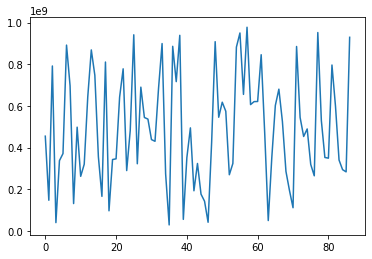

In [28]:
plt.plot(account_stmnt.amount)
plt.show()

### Ejecutar Transferencia

In [29]:
account_stmnt = getAccountStatement(product=df_transactions.iloc[0]['product'])
account_stmnt

Getting account statement for product 5528753
Found 87 transactions from 2010-04-24 00:00:00 to 2020-12-23 00:00:00


,id,nature,accounting_date,amount,product,mvt
0,6628471,Cr,2010-04-24,4.544238e+08,5528753,4.544238e+08
1,8205251,Cr,2010-06-02,1.467450e+08,5528753,1.467450e+08
2,6481724,Cr,2010-08-13,7.915020e+08,5528753,7.915020e+08
3,8807089,Cr,2010-09-07,3.936001e+07,5528753,3.936001e+07
4,9505573,Cr,2010-12-04,3.369653e+08,5528753,3.369653e+08
...,...,...,...,...,...,...
82,9515754,Cr,2020-06-21,5.975533e+08,5528753,5.975533e+08
83,8110161,Dr,2020-08-16,3.398751e+08,5528753,-3.398751e+08
84,8134430,Cr,2020-08-24,2.936960e+08,5528753,2.936960e+08
85,9367845,Cr,2020-09-07,2.830342e+08,5528753,2.830342e+08


### Generar tablas

In [30]:
'''df_deposits.to_csv("db/deposits.csv")
df_loans.to_csv("db/loans.csv")
df_transactions.to_csv("db/transactions.csv")
df_clients.to_csv("db/clients.csv")
df_CreditCards.to_csv("db/CreditCards.csv")
'''

&#39;df_deposits.to_csv(&quot;db/deposits.csv&quot;)\ndf_loans.to_csv(&quot;db/loans.csv&quot;)\ndf_transactions.to_csv(&quot;db/transactions.csv&quot;)\ndf_clients.to_csv(&quot;db/clients.csv&quot;)\ndf_CreditCards.to_csv(&quot;db/CreditCards.csv&quot;)\n&#39;

## Pruebas

In [31]:
deposits = pd.read_csv("db/deposits.csv")
loans = pd.read_csv("db/loans.csv")

dep2 = deposits[deposits.owner == '6-832-434']
loans2 = loans[loans.owner == '6-832-434']
print(dep2)
client_products = []
for i in range(len(dep2)):
    #print(dep2.iloc[i].type)
    if eval(dep2.iloc[i].type) == SavingAccount:
        client_products.append(SavingAccount(
            id = str(dep2.iloc[i].id),
            interest_rate = dep2.iloc[i].interest_rate,
            balance = float(dep2.iloc[i].balance),
            owner = dep2.iloc[i].owner
        ))
    if eval(dep2.iloc[i].type) == FixedTermDeposit:
        client_products.append(FixedTermDeposit(
            id = str(dep2.iloc[i].id),
            interest_rate = dep2.iloc[i].interest_rate,
            balance = float(dep2.iloc[i].balance),
            owner = dep2.iloc[i].owner
        ))
for i in range(len(loans2)):

    client_products.append(Loan(
            id = str(loans2.iloc[i].id),
            interest_rate = loans2.iloc[i].interest_rate,
            balance = float(loans2.iloc[i].balance),
            owner = loans2.iloc[i].owner,
            length = loans2.iloc[i].length,
            base = loans2.iloc[i].base
        ))


Empty DataFrame
Columns: [Unnamed: 0, id, interest_rate, balance, owner, type]
Index: []


In [32]:
p = Client.getClientProducts(client='4-523-333')
p

[]

In [33]:
import pandas as pd
from models import Product
pd.options.display.float_format = '${:,.2f}'.format
print(os.getcwd())
deposits = pd.read_csv("db/deposits.csv")

d:\AQUI\banking-system-emulator\flask-app\app


In [34]:
Client.getClientProducts(client='8-481-903')

[]

In [35]:
#Product.getProductBalance(id=7721659)

In [36]:
'{:.2f}'.format(14669322166.459997)

&#39;14669322166.46&#39;

In [37]:
l = Loan(length = 12,base=365,balance=500,id='12123',interest_rate=3,owner="")
l.generate_amortization_table()

KeyError: &#39;From&#39;

In [38]:

Transfer.Execute(to=5492655385368401, From= 2158026, amount= 500)



Executing Bank Transfer
soy tarjeta
            id nature            accounting_date          amount  \
0      8109076     Cr 2012-05-16 00:00:00.000000 $398,446,946.48   
1      4086066     Cr 2014-09-19 00:00:00.000000 $231,650,758.77   
2      9605322     Cr 2020-07-04 00:00:00.000000 $519,124,832.87   
3      9431797     Cr 2014-03-21 00:00:00.000000 $340,282,511.45   
4      8019823     Cr 2012-01-23 00:00:00.000000  $83,078,849.41   
...        ...    ...                        ...             ...   
67552   664543     Dr 2020-10-02 15:51:49.834116     $397,351.00   
67553   690125     Cr 2020-10-02 15:52:03.088326         $500.00   
67554   851801     Dr 2020-10-02 15:52:03.089316     $396,851.00   
67555   185845     Cr 2020-10-02 15:53:33.006466         $500.00   
67556   673834     Dr 2020-10-02 15:53:33.008565     $396,351.00   

                product             mvt  
0               1917751 $398,446,946.48  
1               1917751 $231,650,758.77  
2               19177